## Introduction

URL Dashboard : https://public.tableau.com/views/DataVisualization_17502503273530/SalesDashboard?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Problem Statement and Dataset Description

### Latar Belakang
* Pengembalian produk, terutama dalam kategori suplemen kesehatan, merupakan tantangan besar bagi perusahaan. Tingginya tingkat retur dapat meningkatkan biaya operasional dan menurunkan margin keuntungan. Dalam analisis ini, platform pembelian dan wilayah geografis akan menjadi faktor penting yang dianalisis, karena pola pengembalian bisa berbeda tergantung pada platform tempat produk dibeli, seperti di marketplace atau platform lain, dan lokasi geografis pembeli. Mengurangi return produk tidak hanya berdampak pada efisiensi operasional, tetapi juga meningkatkan citra merek dan kepuasan pelanggan

### Topik permasalahan
* Topik yang akan dianalisis adalah tingkat pengembalian (return rate) produk suplemen yang dijual oleh perusahaan, dengan tujuan untuk mengidentifikasi faktor-faktor penyebab tingginya return dan menemukan solusi untuk menguranginya. Analisis ini akan memperhitungkan platform tempat pelanggan membeli produk (misalnya, marketplace online, toko fisik, atau platform lain) serta wilayah geografis untuk memahami perbedaan pola return berdasarkan faktor tersebut

    SMART
    * Specific: Mengurangi jumlah retur produk suplemen 
    * Measurable: Menurunkan return rate sebesar 10% dari nilai awal
    * Achievable: Target dapat dicapai dengan menganalisis kategori produk yang memiliki tingkat retur tinggi berdasarkan data histori
    * Relevant: Penurunan return produk akan berdampak langsung pada peningkatan efisiensi penjualan dan optimalisasi revuenu pendapatan, sehingga mendukung kinerja bisnis secara keseluruhan
    * Time-bound: 3 bulan

### Problem statement
* Mengidentifikasi produk suplemen dengan tingkat return tinggi, serta faktor-faktor penyebabnya, seperti platform pembelian dan wilayah geografis. Dengan analisis yang tepat, perusahaan dapat mengurangi return produk hingga 10% dalam waktu 3 bulan

    Pertanyaan 
    1. Produk mana yang memiliki return rate tertinggi selama 3 bulan terakhir?
    2. Apakah ada kategori produk tertentu yang konsisten memiliki return rate tinggi?
    3. Apakah return rate berbeda signifikan antar platform (Walmart, Amazon, iHerb)?
    4. Apakah diskon yang tinggi berkorelasi dengan peningkatan return produk?
    5. Apakah ada lokasi tertentu (negara) dengan return rate di atas normal?
    6. Berapa nilai rata-rata produk yang dikembalikan dan bagaimana distribusi data return produk tersebut?
    7. hitunglah interval kepercayaan 95% untuk rata-rata return rate produk. Jika target penurunan return rate adalah 10%, apakah target tersebut dapat tercapai berdasarkan interval kepercayaan yang dihitung?

### Penjabaran masalah
* Masalah yang akan dianalisis adalah mengidentifikasi kategori produk suplemen yang memiliki tingkat retur tertinggi, serta menganalisis faktor-faktor terhadap pengembalian produk. Analisis ini akan mencakup analisis statistik untuk mengidentifikasi korelasi antara variabel-variabel seperti kategori produk, platform pembelian, dan wilayah geografis dengan return rate

### Sumber dataset
* https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data



## Data Loading And Exploration Data

* Judul Dataset : Supplement Sales Data
* Link dataset : https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data
* Dataset Details
    1. Date         : Week of the sales
    2. Product Name : The name supplement (ex: vitamin C, protein)
    3. Category     : The Category supplement (ex: Vitamin, Omega)
    4. Unit Sold    : The number of unit sold
    5. Price        : The selling price of product
    6. Revenue      : Total revenue (unit sold * price)
    7. Discount     : Discount on the product
    8. Unit Returned: Number unit returned
    9. Location     : Location sales (USA, UK, Canada)
    10. Platform    : E-Commerce platform (Amazon, Walmart, iHerb)
    

In [ ]:
import pandas as pd

df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

df.head(5)


,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


Menampilkan informasi umum tentang dataset, tipe data, dan jumlah data

In [3]:
df.describe()

,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


Menampilkan data statistik pada kolom numerik

In [4]:
df.isna().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

Menampilkan data yang mempunyai missing value

## Data Cleaning

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

Merubah format menjadi datetime untuk kolom date

## Exploration and Analysis

### Berapa nilai rata-rata produk yang dikembalikan dan bagaimana distribusi data return produk tersebut?

In [6]:
import numpy as np
from scipy import stats


# menghitung dan menambahkan kolom return rate
df['Return Rate'] = df['Units Returned'] / df['Units Sold']


# menghitung statistik deskriptif
desc_stats = df["Return Rate"].agg(['mean', 'median', 'std', 'var'])


print(desc_stats)

mean      0.010186
median    0.007299
std       0.008337
var       0.000070
Name: Return Rate, dtype: float64


Insight
* Rata rata return rate berikisar 1.02% yang artinya dari 100 produk yang dijual, sekitar 1 produk yang akan dikembalikan
* Nilai mean > median yang artinya distribusi data condong kearah kanan, berarti tetap ada produk dengan return ratenya yang tinggi
* standar deviasi sebesar 0.83% yang menunjukan variasi return produk cukup kecil

### Hitunglah interval kepercayaan 95% untuk rata-rata return rate produk. Jika target penurunan return rate adalah 10%, apakah target tersebut dapat tercapai berdasarkan interval kepercayaan yang dihitung?

In [7]:
# Menghitung Confidence Interval 95% 
mean = desc_stats['mean']
std = desc_stats['std']
n = len(df)
low, up = stats.norm.interval(0.95, loc=mean, scale=std / np.sqrt(n))

print('Lower Limit:',low)
print('Upper Limit:',up)


Lower Limit: 0.009939082618857217
Upper Limit: 0.010432680925609734


Target penurunan return rate 10 %
* Target = mean x 90%
* Target = 1.02 x 90 % 
* Target = 0.918 %


Insight
* Dengan convidence interval 95%, bisa di bilang bahwa rata-rata return rate populasi ada di antara 0,994% sampai 1,043%
* Kesimpulannya adalah dengan menurunkan return rate 10% sulit tercapai karena target tersebut berada diluar batas atas dan bawah pada data saat ini


### Produk mana yang memiliki return rate tertinggi selama 3 bulan terakhir?

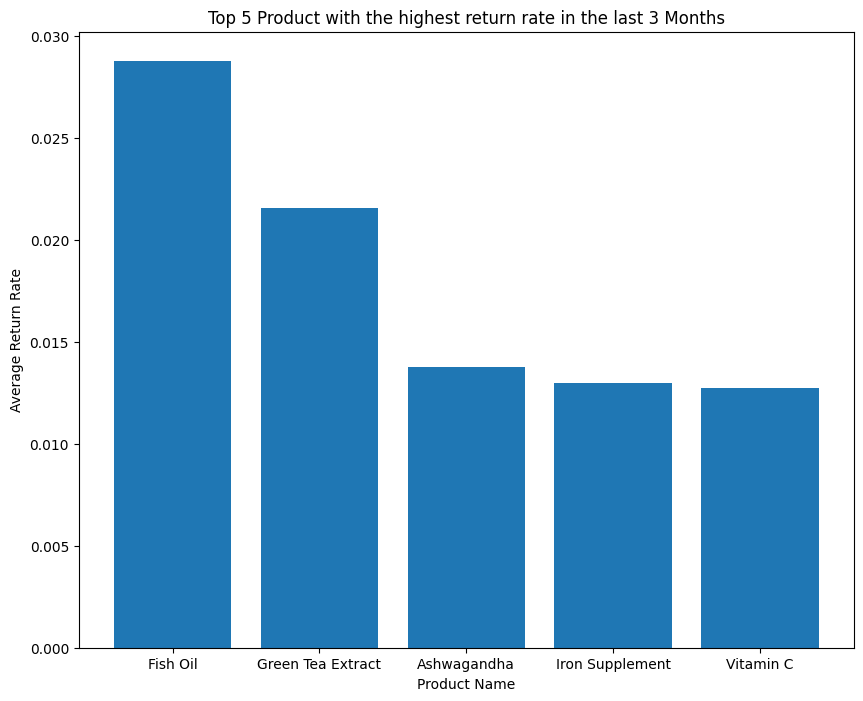

In [8]:
import matplotlib.pyplot as plt

# Filter data untuk 3 bulan terakhir
last_3_month = df[df['Date'] >= df['Date'].max() - pd.DateOffset(month=3)].copy()

#Perhitungan return rate selama 3 Bulan
last_3_month['Return Rate'] = last_3_month['Units Returned'] / last_3_month['Units Sold']

#group by product name
product_return = last_3_month.groupby('Product Name')['Return Rate'].mean().reset_index()

#sorting rate tertinggi
product_return_sort = product_return.sort_values(by='Return Rate', ascending=False)

# product_return_sort

#Visual
plt.figure(figsize=(10,8))
plt.bar(product_return_sort['Product Name'].head(5), product_return_sort['Return Rate'].head(5))
plt.title('Top 5 Product with the highest return rate in the last 3 Months')
plt.xlabel('Product Name')
plt.ylabel('Average Return Rate')
plt.show()

Produk yang memiliki tingkat return rate selama 3 bulan adalah Fish oil dengan return rate sebesar 2%

### Apakah ada kategori produk tertentu yang konsisten memiliki return rate tinggi?

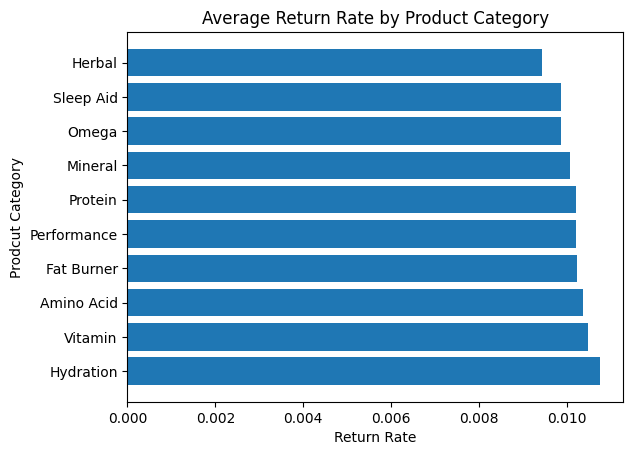

In [9]:
#data
category_return_rate = df.groupby('Category')['Return Rate'].mean().reset_index().sort_values(by='Return Rate', ascending=False)

category_return_rate
#visual
plt.Figure(figsize=(10,8))
plt.barh(category_return_rate['Category'], category_return_rate['Return Rate'])
plt.title('Average Return Rate by Product Category')
plt.ylabel('Prodcut Category')
plt.xlabel('Return Rate')
plt.show()


Category hydration merupakan kategori dengan return rate tertinggi sebesar 1%

### Apakah return rate berbeda signifikan antar platform (Walmart, Amazon, iHerb)?

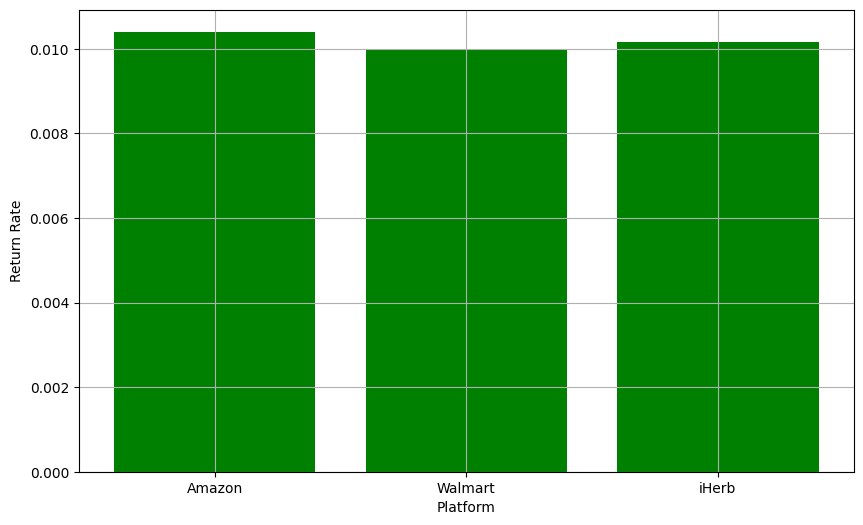

In [10]:

#data
platform_return_rate = df.groupby('Platform')['Return Rate'].mean().reset_index()

platform_return_rate

# #visual
plt.figure(figsize=(10,6))
plt.bar(platform_return_rate['Platform'], platform_return_rate['Return Rate'], color='Green')
plt.grid(True)
plt.xlabel('Platform')
plt.ylabel('Return Rate')
plt.show()

Dapat disimpulkan bahwa platform dengan pengembalian unit return terbesar ada di plaftform amazon

### Apakah diskon yang tinggi berkorelasi dengan peningkatan return produk?

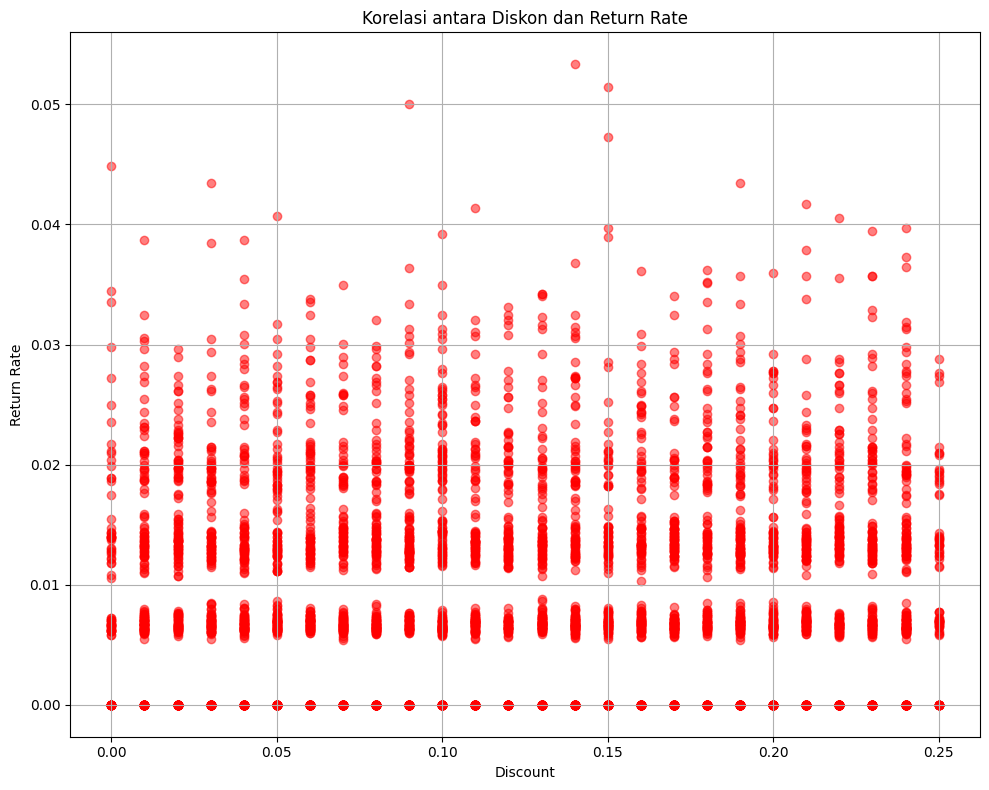

In [11]:
#visual with data
plt.figure(figsize=(10,8))
plt.scatter(df['Discount'], df['Return Rate'], alpha=0.5, color='Red')
plt.xlabel('Discount')
plt.ylabel('Return Rate')
plt.title('Korelasi antara Diskon dan Return Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Dapat disimpulkan bahwa tidak ada korelasi yang kuat antara besar diskon dengan return produk karena penyebaran titik titik horizontal merata pada semua diskon 

### Apakah ada lokasi tertentu (negara) dengan return rate di atas normal?

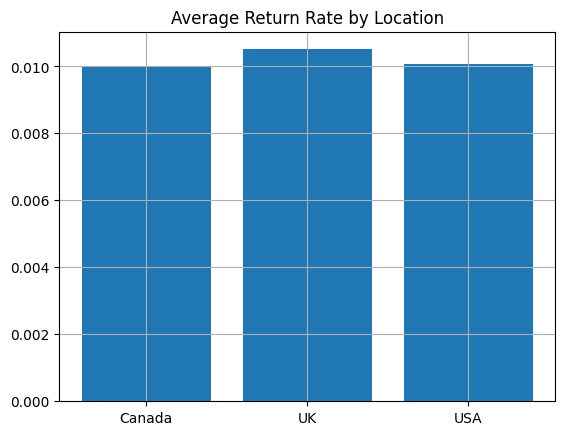

In [12]:

#data
location_return_rate = df.groupby('Location')['Return Rate'].mean().reset_index()
location_return_rate

#visual
plt.Figure(figsize=(10,7))
plt.title('Average Return Rate by Location')
plt.grid(True)
plt.bar(location_return_rate['Location'], location_return_rate['Return Rate'])
plt.show()


Return rate terbesar berada di lokasi UK

## Conclusion

Berdasarkan analisis data return rate produk suplemen, ditemukan beberapa poin penting yang dapat membantu perusahaan dalam mengurangi tingkat pengembalian produk
* Return Rate Rata-Rata: Return rate produk suplemen rata-rata berada di angka 1.02%, yang berarti dari 100 produk yang terjual, sekitar 1 produk 
* Interval Kepercayaan: Berdasarkan interval kepercayaan 95%, return rate diperkirakan berada di antara 0.994% hingga 1.043%. Target penurunan return rate sebesar 10% (menjadi 0.918%) sulit tercapai dalam data saat ini
* Produk dengan Return Rate Tertinggi: Produk seperti Fish Oil menunjukkan return rate yang lebih tinggi, yaitu 2%. Hal ini mengindikasikan bahwa produk ini membutuhkan perhatian lebih dalam hal kualitas atau pemasarannya untuk mengurangi return rate
* Pengaruh Platform: Platform seperti Amazon menunjukkan tingkat pengembalian yang lebih tinggi dibandingkan dengan platform lain, seperti Walmart dan iHerb. Oleh karena itu, perusahaan perlu menganalisis penyebab pengembalian yang lebih tinggi di platform ini
* Korelasi Diskon dengan Return Rate: Tidak ditemukan korelasi signifikan antara besaran diskon dan tingkat return produk. Hal ini menunjukkan bahwa diskon bukan faktor utama yang mempengaruhi pengembalian

Recomendation
* Evaluasi kualitas dan deskripsi produk, karena diskon tidak menunjukkan pengaruh signifikan terhadap return rate, fokus pada aspek ini dapat membantu mengurangi pengembalian
* Fokus pada produk dengan return rate tinggi seperti Fish Oil dan kategori hydration untuk perbaikan kualitas
* Menganalisis lebih lanjut alasan pengembalian di platform Amazon

